In [ ]:
from utils import main
from dataclasses import dataclass

@dataclass
class A :
    base_model_name_or_path : str
    output_data_path : str

main(
    A(
        "Llama-2-7b",
        "llama2/llama2.json"
    )
)
main(
    A(
        "gpt2-medium",
        "gpt/gpt.json"
    )
)
main(
    A(
        "t5-base",
        "t5/t5.json"
    )
)
main(
    A(
        "bert-base-uncased",
        "bert/bert.json"
    )
)
main(
    A(
        "roberta-base",
        "roberta/roberta.json"
    )
)

In [8]:
from utils_vectors import (
    get_bert_delta,
    get_t5_delta
)

In [ ]:
import json
from tqdm import tqdm
from huggingface_hub import ModelCard

paths = []
base_model_name_or_path = "bert-base-uncased"
with open("bert.json", "r") as fin :
    for line in fin :
        dico = json.loads(line)
        path = dico["path"]
        paths.append(path)

embeddings = []
metadata = []
for i, model_name_or_path in tqdm(enumerate(paths)) :
    if i == 0 :
        continue
    try :
        t = get_bert_delta(base_model_name_or_path, model_name_or_path)
        t = t.detach().numpy()
        try :
            card = ModelCard.load(model_name_or_path)
            train_datasets = card.data.datasets
        except :
            train_datasets = None
        embeddings.append(t)
        metadata.append((model_name_or_path, train_datasets))
        print("GOOD")
    except :
        pass

In [11]:
# import numpy as np
# embeddings = np.vstack([e.reshape(1, -1) for e in embeddings]) 
# np.savetxt("t5.out",  embeddings)

In [12]:
# np.savetxt("bert.out",  embeddings)

In [12]:
print(embeddings.shape[0] == len(metadata))

True


In [ ]:
import pandas as pd
df = pd.DataFrame(
    {
        "model_name_or_path" : [e[0] for e in metadata],
        "datasets" : [e[1] for e in metadata]
    }
)

In [14]:
# df.to_csv("bert.csv", index=False)
# df.to_csv("t5.csv", index=False)

In [16]:
import numpy as np
import pandas as pd
#"""
#filename = "t5/t5"
filename = "bert/bertall"
#filename="roberta/roberta"
embeddings = np.loadtxt(f"{filename}.out")
df = pd.read_csv(f"{filename}.csv")
metadata = [(row[1]["model_name_or_path"], row[1]["datasets"]) for row in df.iterrows()]
metadata = [(a, b) if isinstance(b, str) else (a, None) for (a, b) in metadata]
#"""

In [17]:
metadata

[('AndyyyCai/bert-base-uncased-finetuned-copa', None),
 ('AnonymousSub/AR_bert-base-uncased', None),
 ('AnonymousSub/SR_bert-base-uncased', None),
 ('AnonymousSub/bert-base-uncased_squad2.0', None),
 ('AnonymousSub/bert-base-uncased_wikiqa', None),
 ('ArBert/bert-base-uncased-finetuned-ner-kmeans', None),
 ('ArBert/bert-base-uncased-finetuned-ner', None),
 ('Ashkanmh/bert-base-parsbert-uncased-finetuned', None),
 ('EhsanAghazadeh/bert-base-uncased-random-weights', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e1', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e2', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e3', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e4', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e5', None),
 ('EhsanAghazadeh/bert-based-uncased-sst2-e6', None),
 ('GKLMIP/bert-khmer-base-uncased-tokenized', None),
 ('GKLMIP/bert-khmer-base-uncased', None),
 ('GKLMIP/bert-tagalog-base-uncased', None),
 ('Hate-speech-CNERG/bert-base-uncased-hatexplain-rationale

In [21]:
import ast
labels = []
colors = {}
color = 1
for model_name_or_path_, dataset in metadata :
    model_name_or_path = model_name_or_path_.split("/")[-1].lower()
    label = None
    if "roberta" in base_model_name_or_path :
        candidates = ["totto", "squad", "wiki-news", "unifiedqa", "wikisql", "triviaqa", "bbc", "dart", "math", "eli5", "eli", "msmarco", "qa", "sparql"]
    elif "bert" in base_model_name_or_path :
        candidates = ["cola", "mnli", "qnli", "squad", "imdb", "triviaqa", "newsqa", "quac", "sst2", "sst-2", "mrpc", "conll", "issue", "swag"]
    elif "t5" in base_model_name_or_path :
        candidates = ["squad", "mnli", "mrpc", "qqp", "cola", "qnli", "rte"]
    else :
        candidates = []
    
    for candidate in candidates :
        if candidate in model_name_or_path :
            label = candidate
            if label == "sst-2" or label == "sst":
                label = "sst2"
            if label == "eli" :
                label = "eli5"
            if label == "conll" :
                label = "conll2003"
            break
    if label is None :
        if dataset is None :
            label = None
        else :
            if isinstance(dataset, str) :
                print(f"dataset : {dataset}")
                try :
                    dataset = ast.literal_eval(dataset)
                    label = dataset[0]
                except :
                    label = dataset
                print(f"label : {label}")
            else :
                label = dataset[0]   
    if label in colors :
        colors[label] = (colors[label][0], colors[label][1]+1)
    else :
        colors[label] = (color, 1)
        color += 1
    labels.append((model_name_or_path_, label))

dataset : ['hatexplain']
label : hatexplain
dataset : ['wikipedia', 'bookcorpus']
label : wikipedia
dataset : ['wikipedia', 'bookcorpus']
label : wikipedia
dataset : ['adecorpusv2']
label : adecorpusv2
dataset : ['Commonlit-Readibility']
label : Commonlit-Readibility
dataset : ['Commonlit-Readibility']
label : Commonlit-Readibility
dataset : ['glue']
label : glue
dataset : ['glue']
label : glue
dataset : ['masakhaner']
label : masakhaner
dataset : ['masakhaner']
label : masakhaner
dataset : ['masakhaner']
label : masakhaner
dataset : ['batterydata/paper-abstracts']
label : batterydata/paper-abstracts
dataset : ['emotion']
label : emotion
dataset : ['bookcorpus', 'wikipedia']
label : bookcorpus
dataset : ['x_glue']
label : x_glue
dataset : ['ag_news']
label : ag_news
dataset : ['amazon_polarity']
label : amazon_polarity
dataset : ['dbpedia_14']
label : dbpedia_14
dataset : ['yahoo_answers_topics']
label : yahoo_answers_topics
dataset : ['yelp_polarity']
label : yelp_polarity
dataset : [

In [18]:
threshold = 4
colors = {k : v for k, v in sorted(colors.items(), key = lambda x : -x[1][1])}
colors = {k : v for k, v in colors.items() if v[1] >= threshold}

In [19]:
for k, v in colors.items() :
    print(f"key = {k}, value = {v}")

key = None, value = (2, 1246)
key = relbert/semeval2012_relational_similarity_v6, value = (83, 359)
key = squad, value = (3, 222)
key = mnli, value = (14, 176)
key = wikipedia, value = (21, 103)
key = tweet_eval, value = (29, 25)
key = OpenTable, value = (75, 23)
key = tner/tweetner7, value = (63, 21)
key = cola, value = (32, 19)
key = mrpc, value = (15, 16)
key = twitter-api, value = (28, 16)
key = amazon_reviews_multi, value = (100, 12)
key = universal_dependencies, value = (9, 11)
key = cardiffnlp/tweet_topic_multi, value = (72, 11)
key = cardiffnlp/tweet_topic_single, value = (73, 11)
key = rte, value = (33, 10)
key = glue, value = (5, 8)
key = relbert/semeval2012_relational_similarity, value = (96, 7)
key = conll2003, value = (4, 6)
key = cuad, value = (10, 6)
key = imdb, value = (24, 6)
key = klue, value = (26, 6)
key = indonlu, value = (13, 5)
key = qqp, value = (16, 5)
key = sasha/autotrain-data-roberta-base-imdb, value = (65, 5)
key = sasha/autotrain-data-RobertaBaseTweetEval,

In [74]:
# {k : v[1] for k, v in colors.items()}

In [75]:
# colors

In [76]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import umap.umap_ as umap

reducer = umap.UMAP() # n_components=2, n_neighbors=30
scaler = StandardScaler()
embeddings_umap = reducer.fit_transform(embeddings)
# embeddings_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(embeddings)
# embeddings_pca = PCA(n_components=2).fit_transform(embeddings)

In [22]:
from sklearn.metrics import pairwise_distances
import numpy as np
D = pairwise_distances(
    X = embeddings,#_umap,
    Y = embeddings,#_umap,
    n_jobs = -1
)
n_neighbors = 50
P = np.argpartition(D, axis=1, kth=n_neighbors+1)
P = P[:, 1:n_neighbors+1]
predicted_labels = []
for n in range(len(P)):
    dico = {}
    for j in P[n] :
        try :
            dico[labels[j][1]] += 1
        except : 
            dico[labels[j][1]] = 1
    max_number_of_occurrences = max([v for k, v in dico.items()]) 
    predictions = [k for k, v in dico.items() if v == max_number_of_occurrences]
    predicted_labels.append(predictions[0])
M = 0
for i in range(len(P)):
    if labels[i][1] is not None :
        #print(f"i = {i}, label = {labels[i][1]}, prediction = {predicted_labels[i]}")
        M += (labels[i][1] == predicted_labels[i])
ratio = M/sum([1 for _, label in labels if label is not None])
print(f"ratio = {round(ratio*100, 2)}%")

ratio = 74.38%


In [23]:
X = embeddings
W = (X**2).sum(axis=1) + (X**2).sum(axis=1).T - 2*X@X.T

In [24]:
indices = {} # name, dataset
for i, (_, label) in enumerate(labels):
    if label in indices :
        indices[label].append(i)
    else :
        indices[label] = [i]

s = 0
for i, (model_name, label) in enumerate(labels):
    number_of_model_with_same_dataset = colors[label][1]
    #print(f"number of models with the same dataset = {number_of_model_with_same_dataset}")
    distances_to_i = W[i, :]
    #print(f"distances to i : {distances_to_i}, of len {len(distances_to_i)}.")
    #print(f"We should have i^th element equal to 0, d[i] = {distances_to_i[i]}")
    distances_to_i = np.argsort(distances_to_i)
    nearest_neighbors_indices = distances_to_i[:number_of_model_with_same_dataset]
    #print(f"Nearest neighbors indices = {nearest_neighbors_indices}")
    #print(f"Same dataset indices = {indices[label]}")
    intersection = list(set(nearest_neighbors_indices) & set(indices[label]))
    #print(f"intersection length = {len(intersection)}")
    #print(nearest_neighbors_indices)
    ratio = len(intersection)/number_of_model_with_same_dataset
    #print(f"ratio = {ratio}")
    #print("-"*200)
    s += ratio
print(s/len(labels))

0.42610710098386007


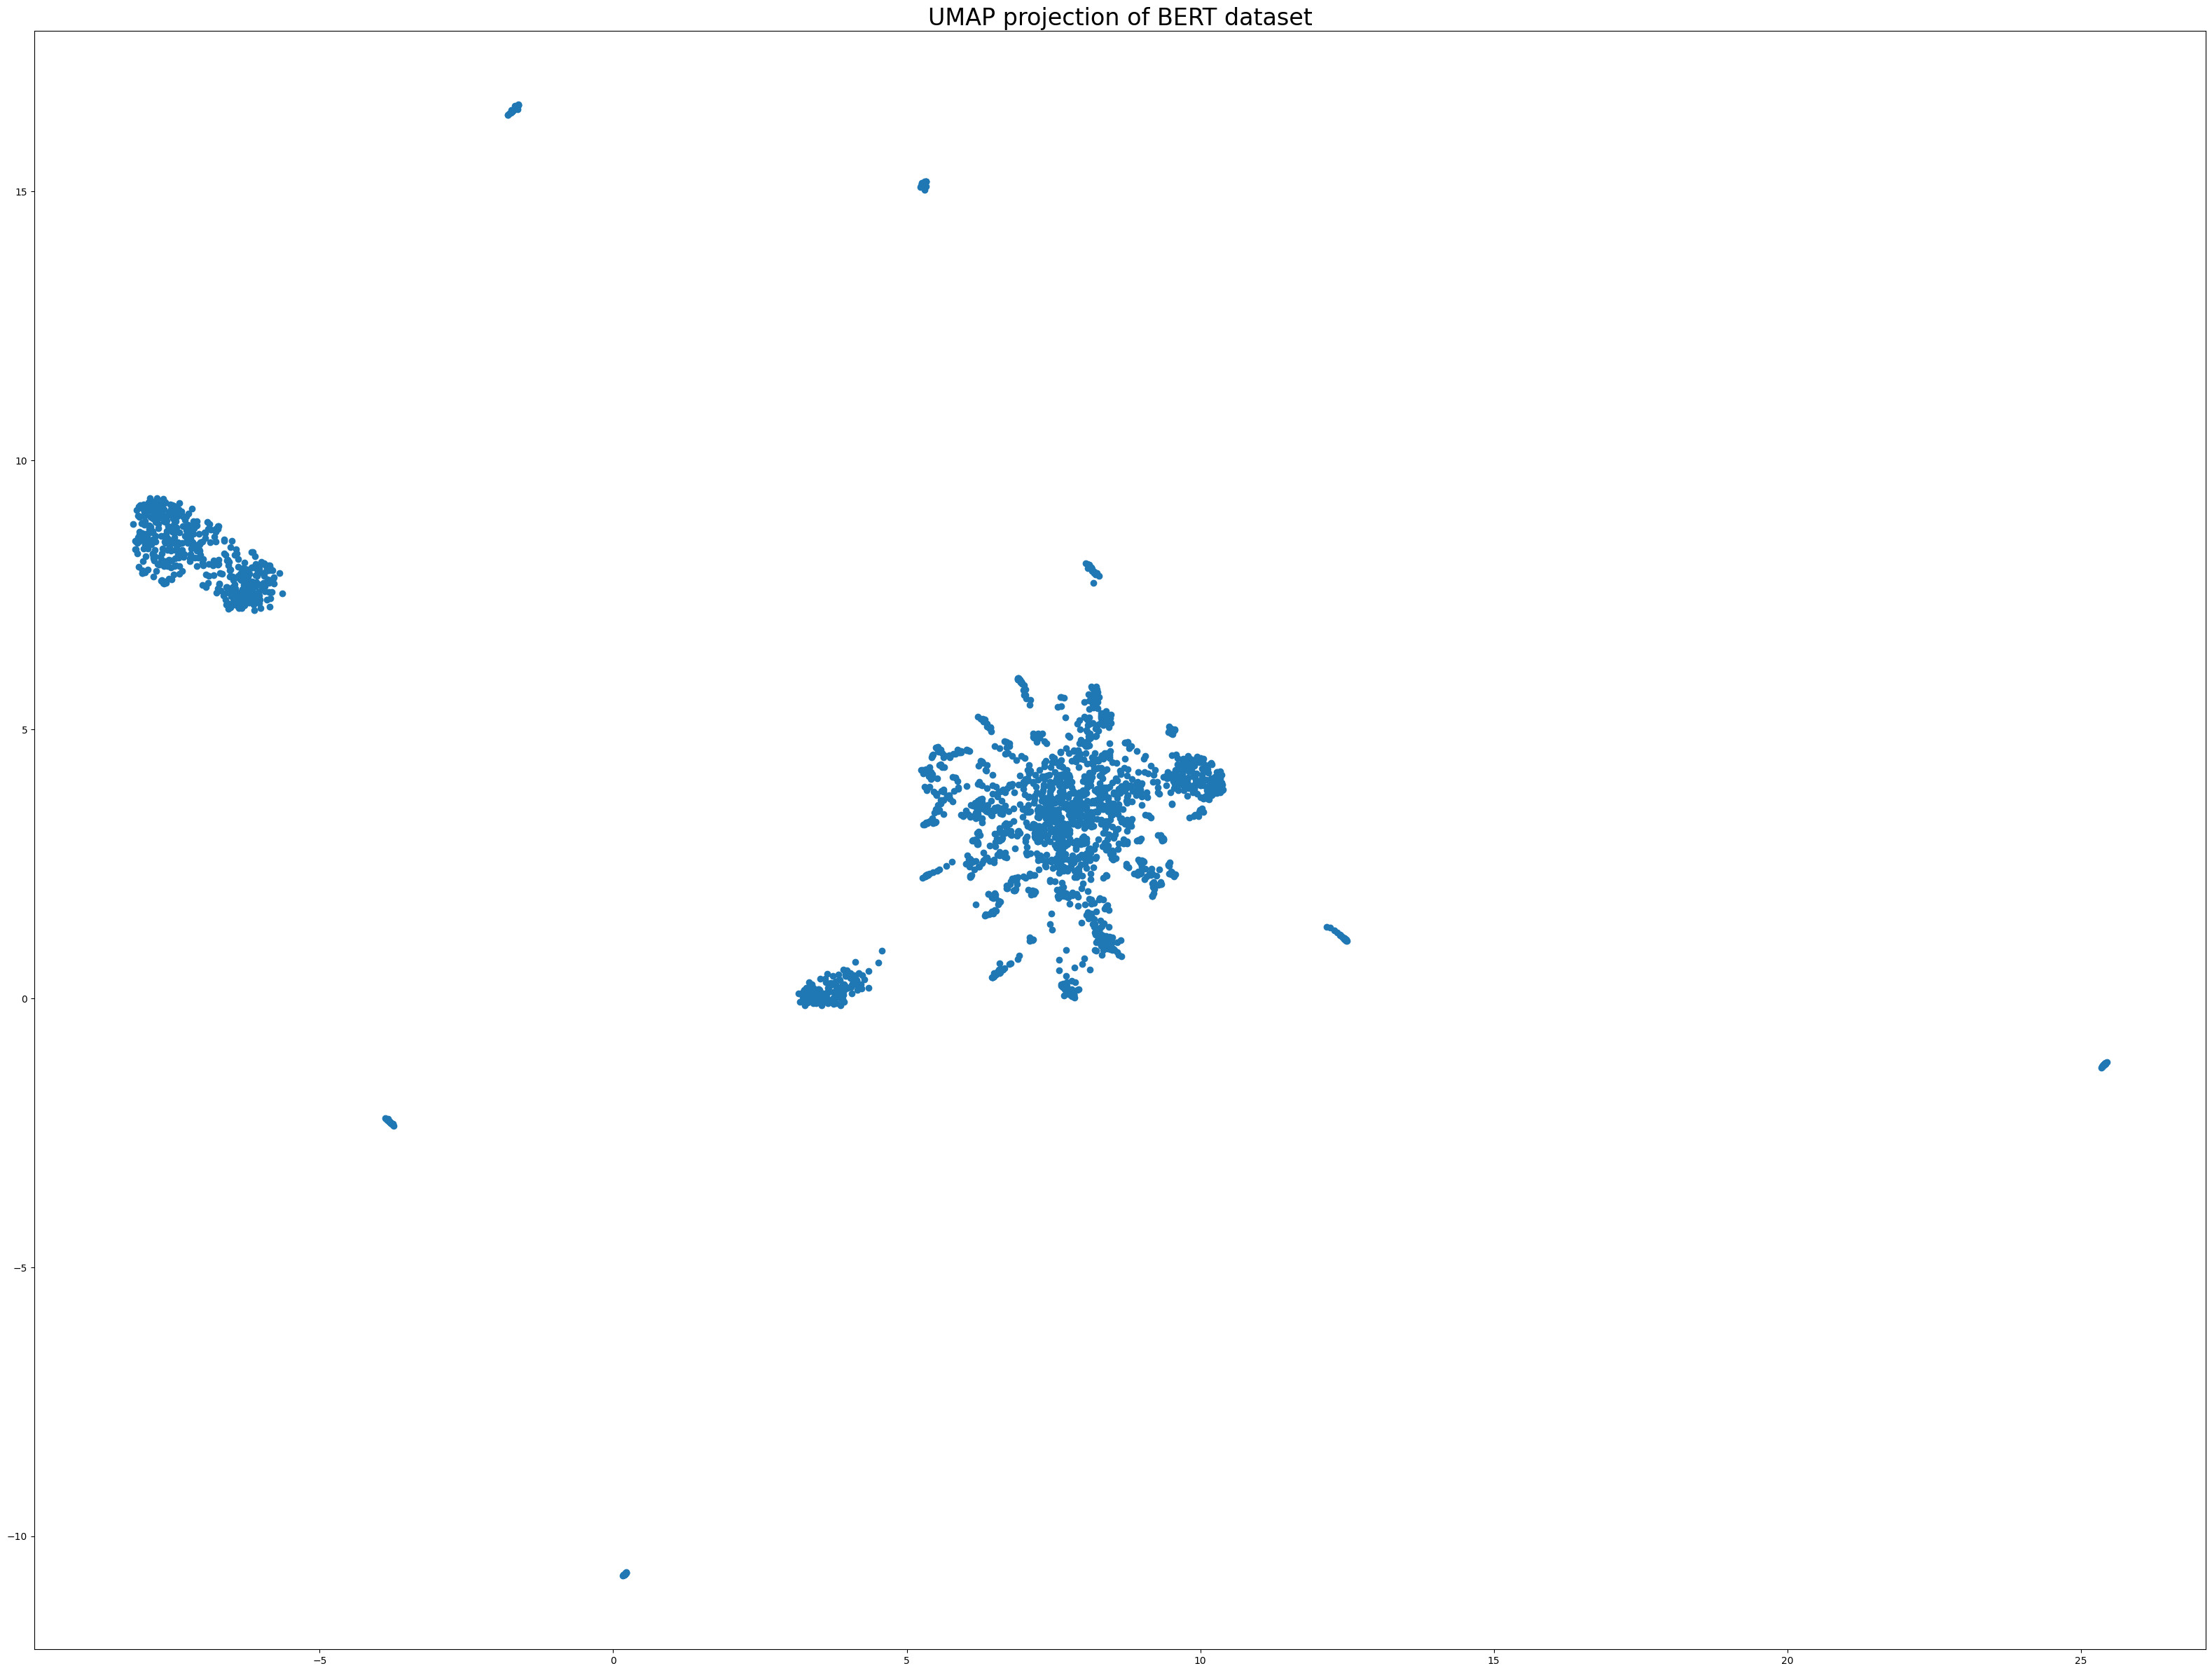

In [15]:
plt.figure(figsize=(40, 30))
plt.scatter(embeddings_umap[:, 0],embeddings_umap[:, 1])
plt.title('UMAP projection of BERT dataset', fontsize=24)
plt.show()

In [31]:
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(width=1000,height=1000)
for color in colors :
    
    if color is None :
        continue
    indices = [i for i in range(len(labels)) if labels[i][1] == color]
    fig.add_trace(
        go.Scatter(
            x=embeddings_umap[indices, 0], 
            y=embeddings_umap[indices, 1],
            mode='markers',
            text=[labels[idx] for idx in indices],
            name = color,
            marker={"color" : colors[color][0]},
        )
    )
indices = [i for i in range(len(labels)) if labels[i][1] is None]
fig.add_trace(
    go.Scatter(
        x=embeddings_umap[indices, 0], 
        y=embeddings_umap[indices, 1],
        mode='markers',
        text=[labels[idx] for idx in indices],
        name = "No dataset detected",
        opacity=0.2
    )
)
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    #title='bert-base-uncased UMAP r=8',
    #title='t5-base UMAP r=8',
    title='roberta-base UMAP r=8',
    plot_bgcolor='white'
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

In [9]:
### SANITY CHECK
candidate_models = hf_api.list_models(
    filter=ModelFilter(
        model_name="bert-base-uncased"
    )
)
import json
paths = []
with open("bert.json", "r") as fin :
    for line in fin :
        dico = json.loads(line)
        path = dico["path"]
        paths.append(path)
tf = 0
jax = 0
py = 0
for c in candidate_models :
    if c.id in paths :
        if 'pytorch' in c.tags :
            py += 1
        elif 'tf' in c.tags :
            tf  += 1
        elif 'jax' in c.tags :
            jax += 1
        else :
            print("YOOO")
        print(c.id)
        print(c.tags)
        print("-"*200)
print(tf)
print(jax)
print(py)
print(jax+tf+py)

bert-base-uncased
['pytorch', 'tf', 'jax', 'rust', 'coreml', 'onnx', 'safetensors', 'bert', 'fill-mask', 'en', 'dataset:bookcorpus', 'dataset:wikipedia', 'arxiv:1810.04805', 'transformers', 'exbert', 'license:apache-2.0', 'autotrain_compatible', 'has_space', 'region:us']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
AndyyyCai/bert-base-uncased-finetuned-copa
['pytorch', 'bert', 'multiple-choice', 'transformers', 'region:us']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
AnonymousSub/AR_bert-base-uncased
['pytorch', 'bert', 'feature-extraction', 'transformers', 'region:us']
--------------------------------------------------------------------------------------------------------------

## VISUALIZATION

In [88]:
import pandas as pd
filename = "./gpt.csv"
#filename = "./t5.csv"
#filename = "./roberta.csv"
#filename = "./bert.csv"
df = pd.read_csv(filename)

In [89]:
df

,layer_0_parameter_0,layer_0_parameter_1,layer_0_parameter_2,layer_0_parameter_3,layer_1_parameter_0,layer_1_parameter_1,layer_1_parameter_2,layer_1_parameter_3,layer_2_parameter_0,layer_2_parameter_1,...,layer_21_parameter_3,layer_22_parameter_0,layer_22_parameter_1,layer_22_parameter_2,layer_22_parameter_3,layer_23_parameter_0,layer_23_parameter_1,layer_23_parameter_2,layer_23_parameter_3,model
0,"[0.8237771987915039, 0.5312483310699463, 0.485...","[0.43599045276641846, 0.37465885281562805, 0.3...","[0.6709516048431396, 0.4349100589752197, 0.369...","[0.6136420965194702, 0.44205647706985474, 0.40...","[0.5449128746986389, 0.433839350938797, 0.3981...","[0.3416178226470947, 0.2934468984603882, 0.251...","[0.7055291533470154, 0.40390557050704956, 0.32...","[0.5756845474243164, 0.3614235520362854, 0.341...","[0.42984479665756226, 0.36750686168670654, 0.3...","[0.35731241106987, 0.2617131173610687, 0.22587...",...,"[1.7217793464660645, 0.8834719657897949, 0.603...","[2.1464617252349854, 0.9348886013031006, 0.530...","[1.09959876537323, 0.5501362681388855, 0.32689...","[2.3746864795684814, 0.8650634288787842, 0.680...","[1.876471757888794, 1.0443781614303589, 0.9691...","[2.7625346183776855, 1.04646897315979, 0.74085...","[0.9185209274291992, 0.596087634563446, 0.3669...","[2.6780903339385986, 0.9166010022163391, 0.853...","[1.6482315063476562, 1.5865719318389893, 0.811...",thrunlab/gpt2-medium
1,"[62.54875946044922, 59.11552429199219, 52.0596...","[5.322758197784424, 4.575860023498535, 4.45852...","[36.02537155151367, 22.325071334838867, 20.179...","[28.9988956451416, 17.883743286132812, 17.0855...","[27.719789505004883, 26.559226989746094, 24.80...","[35.39213943481445, 30.484115600585938, 23.085...","[55.49882507324219, 20.21769905090332, 18.4328...","[40.81041717529297, 25.42798614501953, 24.2435...","[32.55414581298828, 30.358936309814453, 25.939...","[23.147390365600586, 9.887879371643066, 8.6767...",...,"[45.84938430786133, 28.985815048217773, 19.844...","[28.632661819458008, 18.855571746826172, 18.14...","[47.409385681152344, 18.918672561645508, 13.75...","[37.62144088745117, 15.874211311340332, 15.206...","[73.50277709960938, 46.1645393371582, 41.19736...","[38.35707473754883, 25.82317543029785, 24.4097...","[54.518882751464844, 51.614418029785156, 32.00...","[40.03289794921875, 21.673431396484375, 18.568...","[65.30310821533203, 45.9962158203125, 36.64914...",stanford-crfm/arwen-gpt2-medium-x21
2,"[0.21705028414726257, 0.10501036047935486, 0.0...","[0.09976627677679062, 0.07723549753427505, 0.0...","[0.12211036682128906, 0.06852509826421738, 0.0...","[0.29631903767585754, 0.072759710252285, 0.057...","[0.12424370646476746, 0.09294604510068893, 0.0...","[0.122492715716362, 0.07541711628437042, 0.047...","[0.15172763168811798, 0.09924298524856567, 0.0...","[0.2712182104587555, 0.13487637042999268, 0.08...","[0.13061735033988953, 0.11315947026014328, 0.0...","[0.13271519541740417, 0.08634226024150848, 0.0...",...,"[0.6404913067817688, 0.39019671082496643, 0.24...","[0.35088658332824707, 0.21111485362052917, 0.1...","[0.22969217598438263, 0.1483115702867508, 0.11...","[0.3956455886363983, 0.2614379823207855, 0.220...","[0.6341586709022522, 0.43833133578300476, 0.31...","[0.4506562352180481, 0.2983219623565674, 0.200...","[0.47776883840560913, 0.21108724176883698, 0.1...","[0.6706314086914062, 0.4747861623764038, 0.342...","[1.3405261039733887, 0.6097499132156372, 0.116...",aman-mehra/gpt2-medium-finetune-squad-ep-0.48-...
3,"[0.12994201481342316, 0.08276762068271637, 0.0...","[0.08877332508563995, 0.052994802594184875, 0....","[0.11074095964431763, 0.0601920522749424, 0.04...","[0.233584463596344, 0.07920558005571365, 0.049...","[0.08982502669095993, 0.06976799666881561, 0.0...","[0.10061846673488617, 0.059719786047935486, 0....","[0.12550535798072815, 0.06979704648256302, 0.0...","[0.21817149221897125, 0.09833336621522903, 0.0...","[0.10364872217178345, 0.07598964869976044, 0.0...","[0.10724889487028122, 0.0619587898254394

In [90]:
import json
threshold = 0.5
df2 = pd.DataFrame(columns=df.columns[:-1], data = [[0]*len(df.columns[:-1])]*df.shape[0])
for col in df.columns[:-1]:
    for i in range(df.shape[0]):
        s = json.loads(df.loc[i, col])
        if s[0] == 0 :
            continue
        s = [e**2 for e in s]
        s = [e/sum(s) for e in s]
        r = 0
        proportion = 0
        while proportion < threshold :
            proportion += s[r]
            r += 1
        df2.loc[i, col] = r
        #print(f"i = {i}, col = {col}, rank = {r}")

In [91]:
if "roberta" in filename :
    A = 12
    B = 6
    names = ["W_q", "W_k", "W_v", "W_o", "W_1", "W_2"]
elif "bert" in filename :
    A = 12
    B = 6
    names = ["W_q", "W_k", "W_v", "W_o", "W_1", "W_2"]
elif "gpt" in filename :
    A = 24
    B = 4
    names = ["c_proj", "c_attn", "mlp_1", "mlp_2"]
elif "t5" in filename :
    A = 12
    B = 16
    names = ["W_q", "W_k", "W_v", "W_o", "W_1", "W_2"]
    names += ["W_q_dec_s_attn", "W_k_dec_s_attn", "W_v_dec_s_attn", "W_o_dec_s_attn"]
    names += ["W_q_dec_c_attn", "W_k_dec_c_attn", "W_v_dec_c_attn", "W_o_dec_c_attn"]
    names += ["W_1_dec", "W_2_dec"]
else :
    A, B = None, None
    
average = df2.mean(axis=0)
dico = {i : [average[f"layer_{j}_parameter_{i}"] for j in range(A)] for i in range(B)}

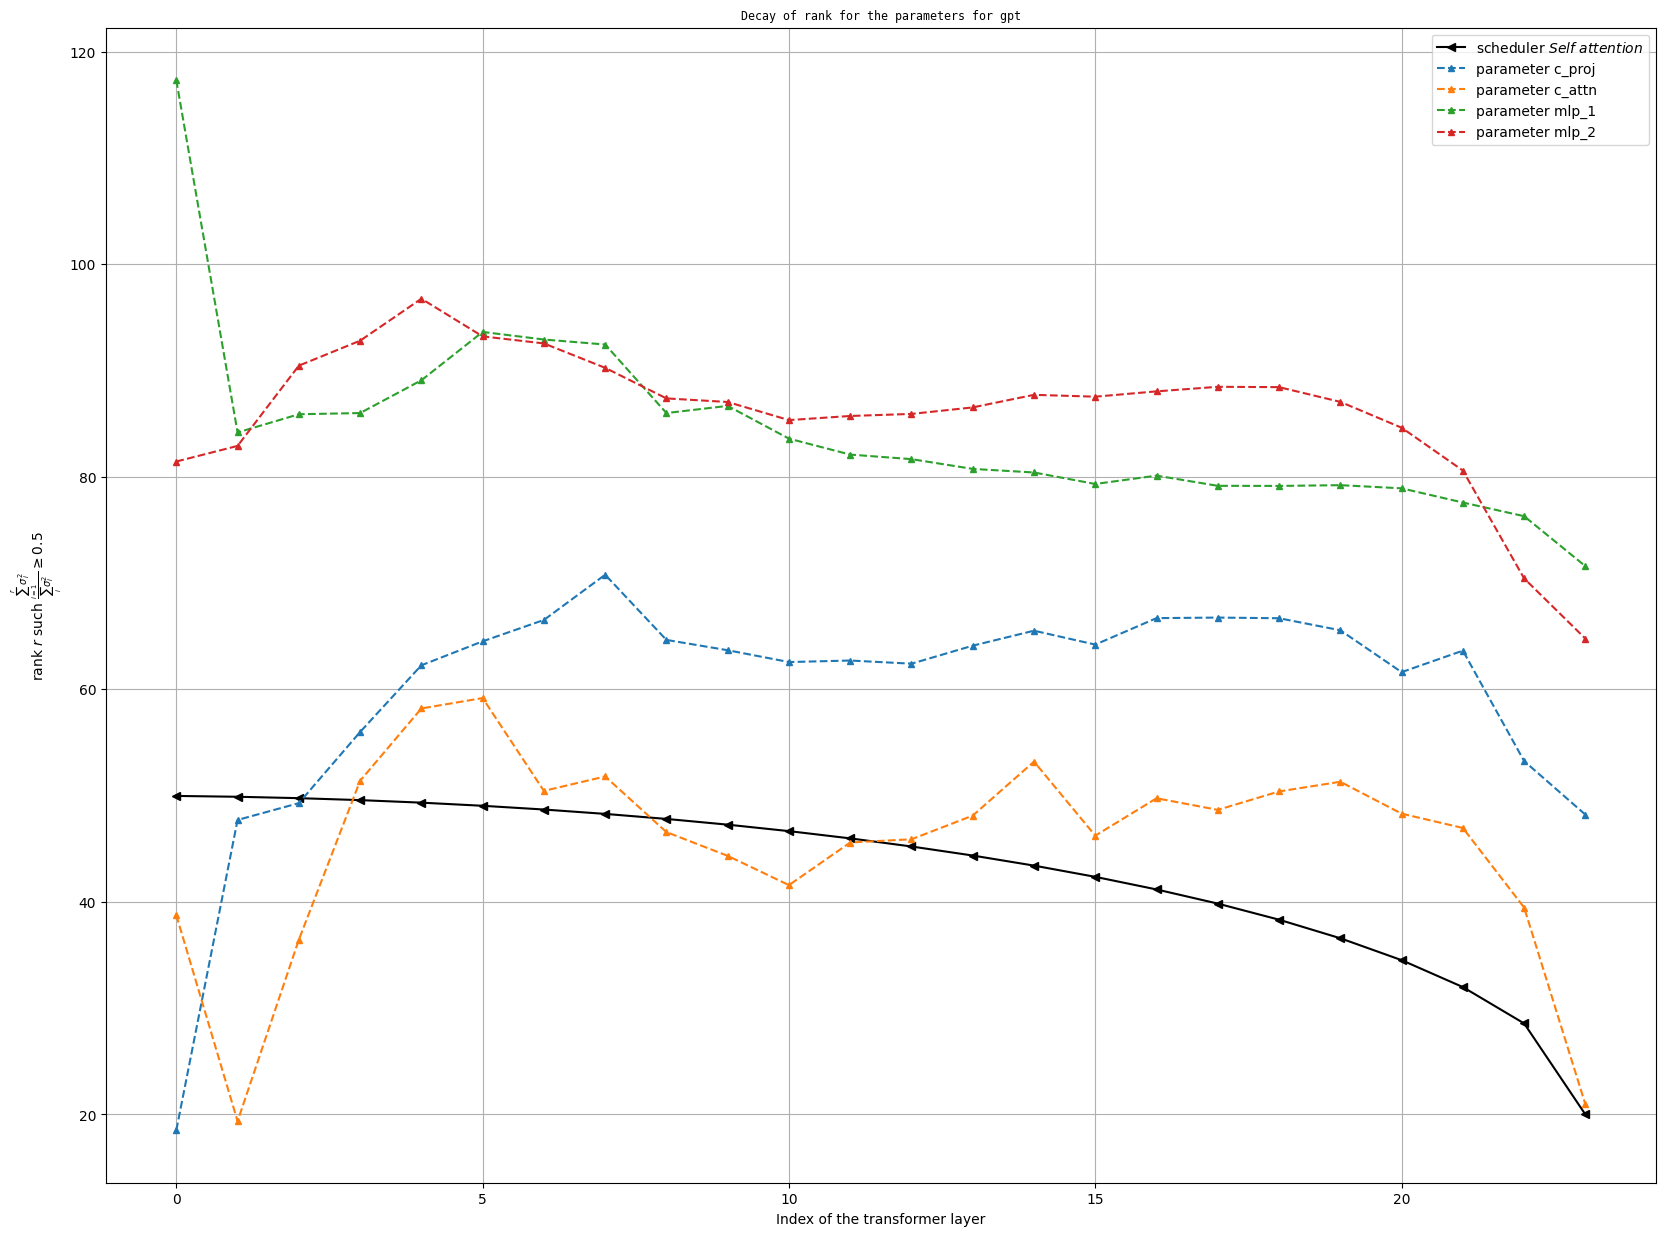

In [97]:
import matplotlib.pyplot as plt
import numpy as np
def approx(x, r_min, r_max, A):
    return r_min + (r_max - r_min)*np.sqrt(1 - ((x+1)/A)**2)

x = np.arange(A)
plt.figure(figsize=(20,15))
#plt.plot(x, approx(x, r_min=70, r_max=300, A=A), label="scheduler $W_1$", color="black", marker="o")
#plt.plot(x, approx(x, r_min=30, r_max=270, A=A), label="scheduler $W_2$", color="black", marker=">")
#plt.plot(x, approx(x, r_min=50, r_max=140, A=A), label="scheduler $Self~attention$", color="black", marker="<")
for i in range(B):
    plt.plot(x, dico[i], label=f"parameter {names[i]}", marker="^", markersize=5, linestyle='dashed')
plt.title(f"Decay of rank for the parameters for {filename.split('/')[-1].split('.')[0]}",  family='monospace', fontsize='small')
plt.xlabel("Index of the transformer layer")
plt.ylabel("rank $r$ such $\\frac{\sum_{i=1}^r\sigma_i^2}{\sum_i \sigma_i^2} \geq $"+f"{threshold}")
plt.legend()
plt.grid()
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
inputs = x
outputs = [(e - min(dico[0]))**2 for e in dico[0]]
lr.fit(np.array(inputs).reshape(-1, 1), np.array(outputs).reshape(-1, 1))

LinearRegression()

## Further tests

In [ ]:
from transformers import AutoModelForCausalLM
base_model_name_or_path = "bigcode/starcoderbase-1b"
ft_model_name_or_path = "abacaj/starcoderbase-1b-sft"
base = AutoModelForCausalLM.from_pretrained(base_model_name_or_path)
ft = AutoModelForCausalLM.from_pretrained(ft_model_name_or_path)

In [26]:
import torch
j = 0
dico = {i : [] for i in range(4)}
for a, b in zip(base.transformer.h, ft.transformer.h):
    if "starcoder" not in base_model_name_or_path :
        continue
    d_1 = a.attn.c_attn.weight - b.attn.c_attn.weight
    d_2 = a.attn.c_proj.weight - b.attn.c_proj.weight
    d_3 = a.mlp.c_fc.weight - b.mlp.c_fc.weight
    d_4 = a.mlp.c_proj.weight - b.mlp.c_proj.weight
    print(f"----- Layer{j} -----")
    for i, d in enumerate([d_1, d_2, d_3, d_4]) :
        s = torch.linalg.svdvals(d)**2
        s = s.tolist()
        s = [e/sum(s) for e in s]
        r = 0
        proportion = 0
        while proportion < 0.8 :
            proportion += s[r]
            r += 1
        dico[i].append(r)
        print(f"parameter : {i}, rank {r}")
    j += 1

----- Layer0 -----
parameter : 0, rank 67
parameter : 1, rank 23
parameter : 2, rank 96
parameter : 3, rank 441
----- Layer1 -----
parameter : 0, rank 29
parameter : 1, rank 9
parameter : 2, rank 158
parameter : 3, rank 20
----- Layer2 -----
parameter : 0, rank 32
parameter : 1, rank 20
parameter : 2, rank 8
parameter : 3, rank 8
----- Layer3 -----
parameter : 0, rank 48
parameter : 1, rank 25
parameter : 2, rank 9
parameter : 3, rank 6
----- Layer4 -----
parameter : 0, rank 55
parameter : 1, rank 22
parameter : 2, rank 43
parameter : 3, rank 6
----- Layer5 -----
parameter : 0, rank 93
parameter : 1, rank 42
parameter : 2, rank 138
parameter : 3, rank 25
----- Layer6 -----
parameter : 0, rank 71
parameter : 1, rank 34
parameter : 2, rank 250
parameter : 3, rank 106
----- Layer7 -----
parameter : 0, rank 161
parameter : 1, rank 77
parameter : 2, rank 388
parameter : 3, rank 192
----- Layer8 -----
parameter : 0, rank 126
parameter : 1, rank 45
parameter : 2, rank 412
parameter : 3, rank 

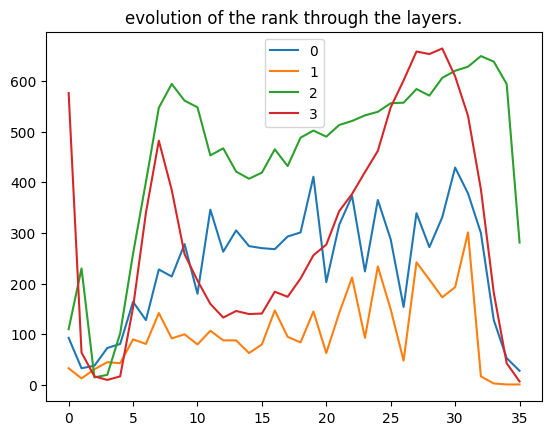

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(j), dico[0], label="0")
plt.plot(np.arange(j), dico[1], label="1")
plt.plot(np.arange(j), dico[2], label="2")
plt.plot(np.arange(j), dico[3], label="3")
plt.title("Evolution of the rank through the layers.")
plt.legend()
plt.show()